Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [39]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np

In [21]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [41]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
dataset_train = pathlib.Path("/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
dataset_test = pathlib.Path("/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [42]:
# find all the classes in the training  classes
class_train = np.array([item.name for item in dataset_train.glob('*')])
class_train

array(['melanoma', 'pigmented benign keratosis', 'basal cell carcinoma',
       'squamous cell carcinoma', 'seborrheic keratosis', 'nevus',
       'actinic keratosis', 'vascular lesion', 'dermatofibroma'],
      dtype='<U26')

In [43]:
# find all the classes in the testing  classes
class_test = np.array([item.name for item in dataset_test.glob('*')])
class_test

array(['dermatofibroma', 'melanoma', 'actinic keratosis', 'nevus',
       'pigmented benign keratosis', 'squamous cell carcinoma',
       'seborrheic keratosis', 'vascular lesion', 'basal cell carcinoma'],
      dtype='<U26')

In [44]:
image_cnt_train = len(list(dataset_train.glob('*/*.jpg')))
print(image_cnt_train)


2239


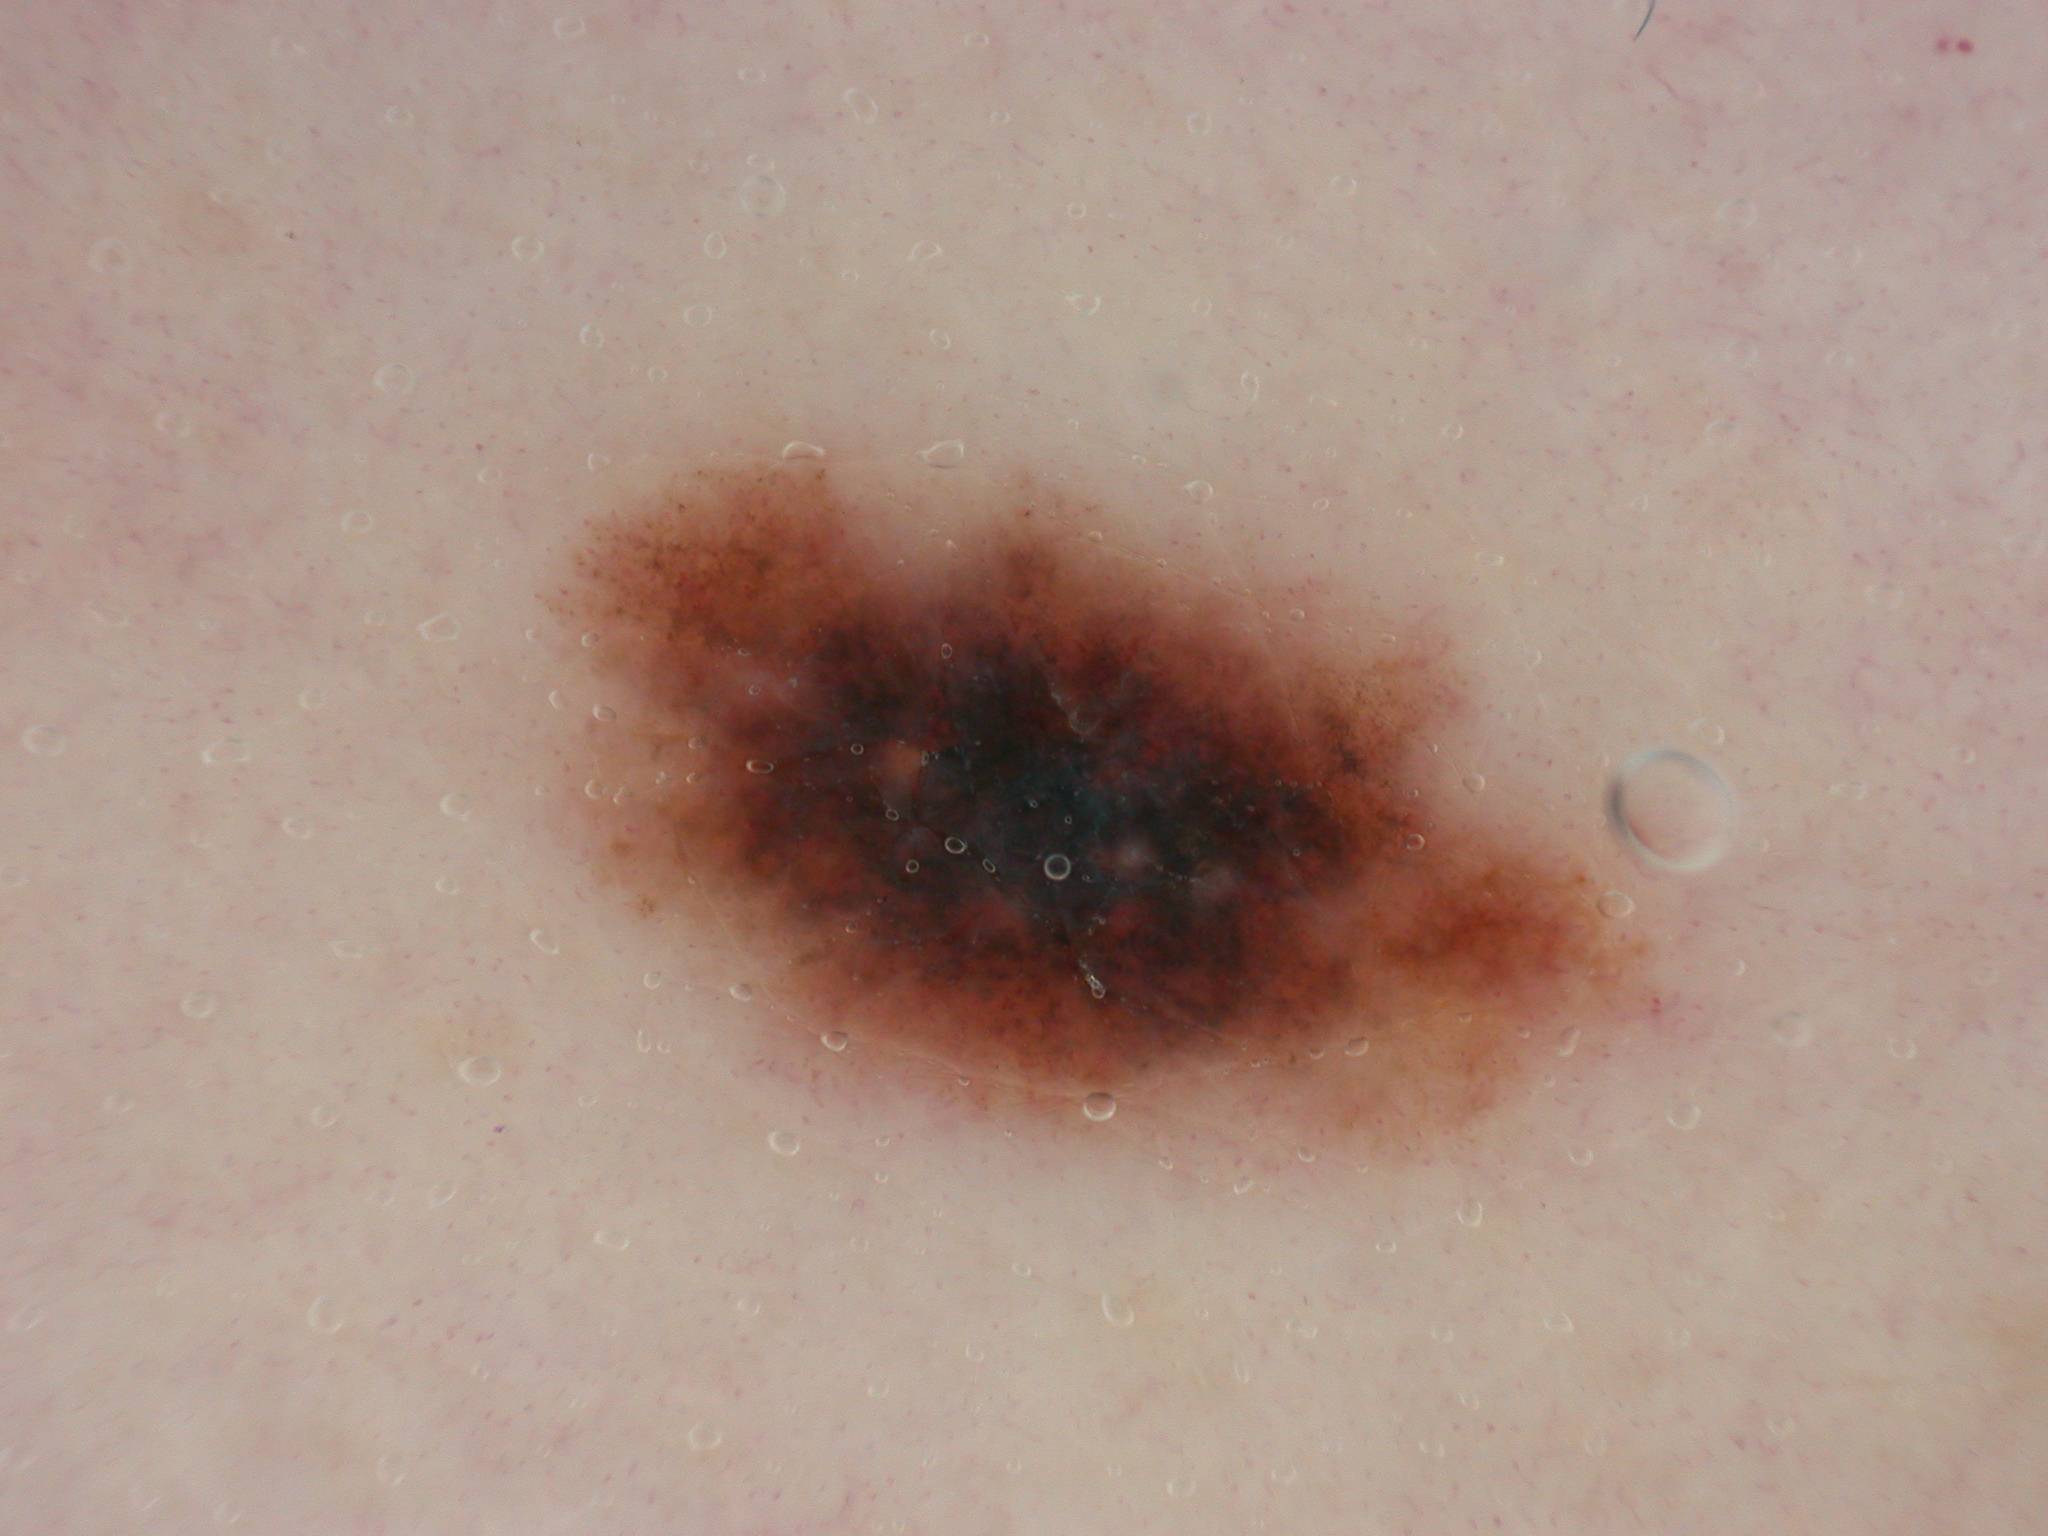

In [45]:
img_train = list(dataset_train.glob('*/*.jpg'))
PIL.Image.open(str(img_train[1]))

In [47]:
img_test = list(dataset_test.glob('*/*.jpg'))
PIL.Image.open(str(img_test[1]))

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [53]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [54]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [56]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

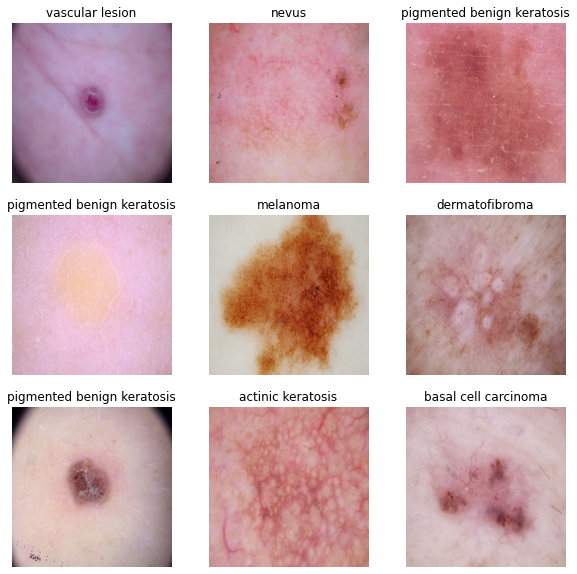

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [58]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [59]:
num_classes = 9
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [60]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model.build(input_shape=(None,180,180,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 118336)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

### Train the model

In [62]:
epochs = 20
history = model.fit(train_ds,batch_size=batch_size,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 311s 1s/step - loss: 3.2707 - accuracy: 0.2052 - val_loss: 1.8025 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 1.6546 - accuracy: 0.3924 - val_loss: 1.6220 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4577 - accuracy: 0.4869 - val_loss: 1.4829 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4295 - accuracy: 0.4942 - val_loss: 1.4076 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2292 - accuracy: 0.5807 - val_loss: 1.5438 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1170 - accuracy: 0.6063 - val_loss: 1.5440 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 0.9471 - accuracy: 0.6699 - val_loss: 1.5612 - val_accuracy: 0.5280
Epoch 8/20
56

### Visualizing training results

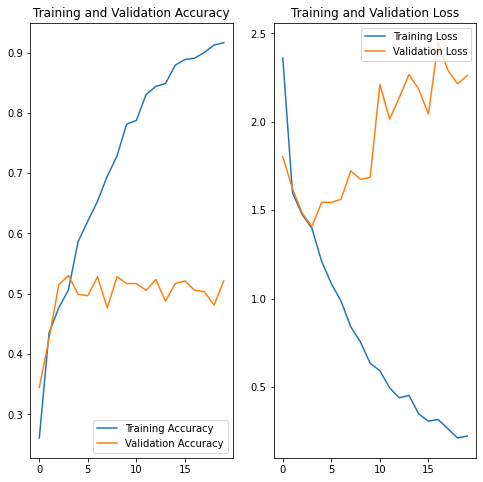

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [64]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),      
  ]
)

### Todo:
### Create the model, compile and train the model


In [65]:

model = tf.keras.Sequential([data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [66]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 88, 88, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 21, 21, 64)       

### Training the model

In [68]:
epochs = 20
history = model.fit(train_ds,batch_size=batch_size,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 2s 21ms/step - loss: 2.0649 - accuracy: 0.2553 - val_loss: 1.6213 - val_accuracy: 0.4251
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 1.6087 - accuracy: 0.4369 - val_loss: 1.4830 - val_accuracy: 0.4989
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4661 - accuracy: 0.4741 - val_loss: 1.4527 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4955 - accuracy: 0.4486 - val_loss: 1.4712 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3960 - accuracy: 0.5108 - val_loss: 1.3957 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3626 - accuracy: 0.5149 - val_loss: 1.4098 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3257 - accuracy: 0.5336 - val_loss: 1.3954 - val_accuracy: 0.5101
Epoch 8/20
56

### Visualizing the results

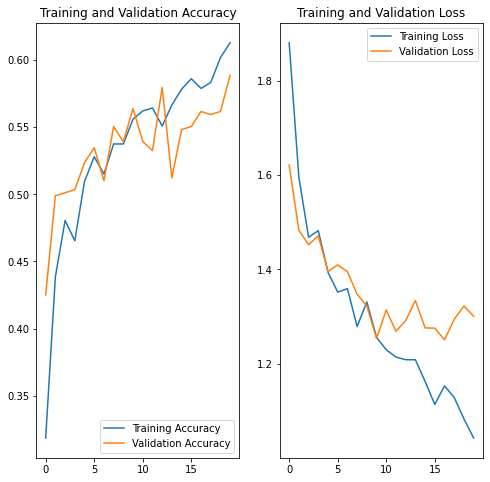

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [70]:
from glob import glob
path_list = [x for x in glob(os.path.join(dataset_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(dataset_train,'*','*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns=['Path','Label'])

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [71]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [72]:
pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [73]:
path_to_training_dataset="/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52E018F780>:   0%|          | 1/500 [00:00<00:54,  9.08 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52E00E0400>: 100%|██████████| 500/500 [00:20<00:00, 24.29 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52E00865F8>: 100%|██████████| 500/500 [00:20<00:00, 24.23 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52D45C1E80>:   0%|          | 1/500 [00:00<01:07,  7.42 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52E00DF588>: 100%|██████████| 500/500 [00:20<00:00, 24.55 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3008x2000 at 0x7F537B5D3F98>: 100%|██████████| 500/500 [01:33<00:00,  5.34 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F537B573C18>: 100%|██████████| 500/500 [01:33<00:00,  5.36 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52D462A5F8>:   0%|          | 2/500 [00:00<00:25, 19.89 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52E16D3B70>: 100%|██████████| 500/500 [00:19<00:00, 25.12 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F52D6F54B38>: 100%|██████████| 500/500 [00:45<00:00, 10.99 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52E1F3D438>:   0%|          | 1/500 [00:00<00:54,  9.08 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52D6F797B8>: 100%|██████████| 500/500 [00:20<00:00, 24.30 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F52D6F54D30>:   0%|          | 1/500 [00:00<00:53,  9.37 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52D45FAF60>: 100%|██████████| 500/500 [00:20<00:00, 24.28 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [74]:
image_count_train = len(list(dataset_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [75]:
from glob import  glob
path_list_new = [x for x in glob(os.path.join(dataset_train, '*','output', '*.jpg'))]
path_list_new[0:5]

['/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010648.jpg_40f1a11f-a797-48de-9a20-c957cf5e13f8.jpg',
 '/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010652.jpg_b381a5e9-053a-4aab-bd72-5f10121ecd34.jpg',
 '/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010299.jpg_3dfc038a-ede3-47c7-988f-07a2255d3021.jpg',
 '/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010441.jpg_498f9be8-ed61-4a22-94e9-5b1dcf1c0287.jpg',
 '/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/outpu

In [76]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(dataset_train, '*','output', '*.jpg'))]
lesion_list_new[0:5]

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [77]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [78]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [79]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [80]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [81]:
data_dir_train="/content/drive/MyDrive/CNN Assignment/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [82]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [84]:
model = tf.keras.Sequential([data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(2),
layers.Dropout(0.25),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [85]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [86]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 44s 250ms/step - loss: 2.3691 - accuracy: 0.1557 - val_loss: 1.8152 - val_accuracy: 0.3111
Epoch 2/50
169/169 [==============================] - 42s 241ms/step - loss: 1.6205 - accuracy: 0.3753 - val_loss: 1.4642 - val_accuracy: 0.4581
Epoch 3/50
169/169 [==============================] - 43s 243ms/step - loss: 1.4516 - accuracy: 0.4432 - val_loss: 1.4012 - val_accuracy: 0.4744
Epoch 4/50
169/169 [==============================] - 42s 241ms/step - loss: 1.3784 - accuracy: 0.4696 - val_loss: 1.3954 - val_accuracy: 0.4759
Epoch 5/50
169/169 [==============================] - 42s 240ms/step - loss: 1.3347 - accuracy: 0.4802 - val_loss: 1.2993 - val_accuracy: 0.4870
Epoch 6/50
169/169 [==============================] - 41s 238ms/step - loss: 1.2762 - accuracy: 0.4992 - val_loss: 1.3177 - val_accuracy: 0.4774
Epoch 7/50
169/169 [==============================] - 41s 238ms/step - loss: 1.2236 - accuracy: 0.5262 - val_loss: 1.2112 - val_ac

#### **Todo:**  Visualize the model results

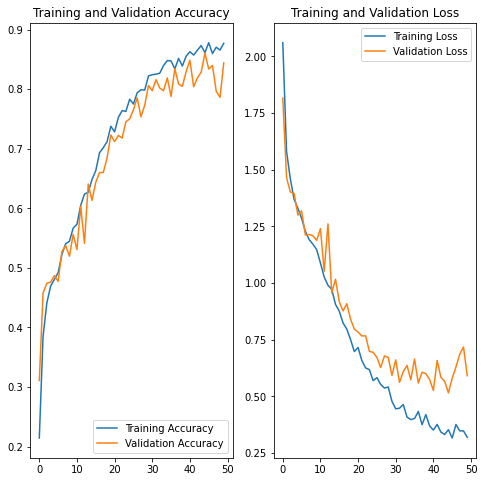

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After Data Augmentation, reduce in over-fitting have been reduced and accuracy has been increased. 
The final accuracy obtained post training the data is : accuracy: 0.8723 ,
val_accuracy: 0.8441